In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ADMISSIONS.csv")
df.head(5)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             129 non-null    object
 5   deathtime             40 non-null     object
 6   admission_type        129 non-null    object
 7   admission_location    129 non-null    object
 8   discharge_location    129 non-null    object
 9   insurance             129 non-null    object
 10  language              81 non-null     object
 11  religion              128 non-null    object
 12  marital_status        113 non-null    object
 13  ethnicity             129 non-null    object
 14  edregtime             92 non-null     object
 15  edouttime             92 non-null     ob

In [4]:
# 1. 총 환자 수
# 중복된 환자 수?
df['row_id'].count()

129

In [5]:
# 2. 평균 입원 시간
temp = pd.to_datetime(df['dischtime']) - pd.to_datetime(df['admittime'])
temp.mean()

Timedelta('9 days 07:58:33.488372093')

In [6]:
# 3. 입원 유형(admission_type)의 종류와 유형별 환자 수
df['admission_type'].value_counts()


EMERGENCY    119
ELECTIVE       8
URGENT         2
Name: admission_type, dtype: int64

In [7]:
# 4. 진단명(diagnosis)의 종류와 진단별 환자 수
df['diagnosis'].value_counts()

SEPSIS                                  10
PNEUMONIA                                8
SHORTNESS OF BREATH                      4
FEVER                                    4
CONGESTIVE HEART FAILURE                 3
                                        ..
SEPSIS;TELEMETRY                         1
HYPOTENSION;TELEMETRY                    1
CRITICAL AORTIC STENOSIS/HYPOTENSION     1
OVERDOSE                                 1
CHOLANGITIS                              1
Name: diagnosis, Length: 95, dtype: int64

In [27]:
df['religion'].value_counts()

CATHOLIC               59
NOT SPECIFIED          19
UNOBTAINABLE           19
PROTESTANT QUAKER      10
JEWISH                 10
OTHER                   4
CHRISTIAN SCIENTIST     3
MUSLIM                  2
BUDDHIST                1
ROMANIAN EAST. ORTH     1
Name: religion, dtype: int64

In [28]:
df['religion'].describe()

count          128
unique          10
top       CATHOLIC
freq            59
Name: religion, dtype: object

In [72]:
def show_piechart(column):
    labels = [m for m in df[column].unique()]
    values = []
    for j in labels:
        values.append(len(df.loc[df[column] == j]))
    plt.pie(values, labels=labels)
    plt.show


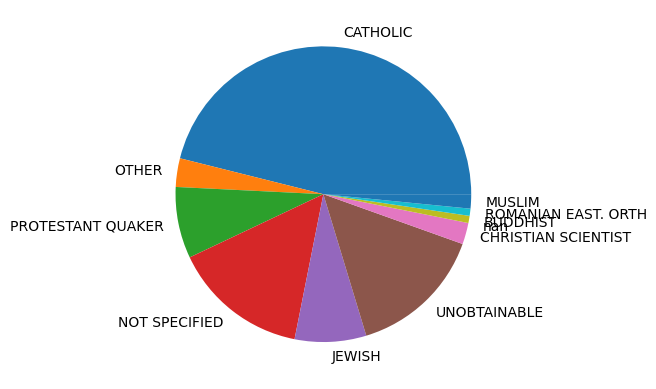

In [73]:
# f, axes = plt.subplot(1, 3)
# f.set_size_inches((20, 15))
# plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
# # axes[0, 0].pie(show_piechart('religion'))
# plt.show()
show_piechart('religion')

In [93]:
def show_barchart(column):
    xlabels = [m for m in df[column].unique()]
    # yvalues = []
    # for j in xlabels:
    #     yvalues.append(len(df.loc[df[column] == j]))
    yvalues = df.groupby(column)['row_id'].count().values.tolist()

    print(xlabels)
    print(yvalues)
    plt.bar(np.arange(len(xlabels)), yvalues)
    plt.xticks(np.arange(len(xlabels)), xlabels)
    plt.show()

['CATHOLIC', 'OTHER', 'PROTESTANT QUAKER', 'NOT SPECIFIED', 'JEWISH', 'UNOBTAINABLE', 'CHRISTIAN SCIENTIST', nan, 'BUDDHIST', 'ROMANIAN EAST. ORTH', 'MUSLIM']
[1, 59, 3, 10, 2, 19, 4, 10, 1, 19]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

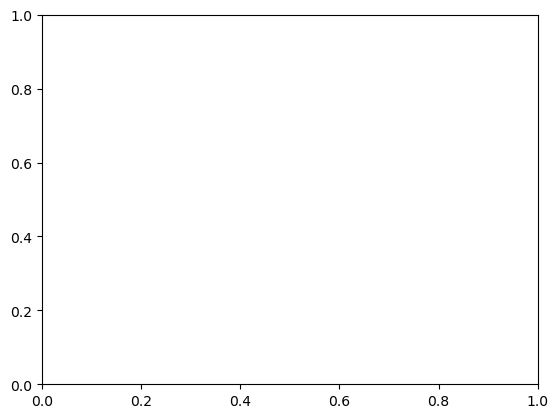

In [94]:
show_barchart('religion')